#### Import Libraries

In [211]:
import pandas as pd
from datetime import timedelta 
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Wrangling and combining into a single file

In [212]:
files = [
    "2023-01-tripdata.csv", "2023-02-tripdata.csv",
    "2023-03-tripdata.csv", "2023-04-tripdata.csv",
    "2023-05-tripdata.csv", "2023-06-tripdata.csv",
    "2023-07-tripdata.csv", "2023-08-tripdata.csv",
    "2023-09-tripdata.csv", "2023-10-tripdata.csv",
    "2023-11-tripdata.csv", "2023-12-tripdata.csv"  
]
trip_list = [pd.read_csv(file) for file in files]

In [213]:
trip_23 = pd.concat(trip_list, ignore_index=True)

In [214]:
trip_23.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [215]:
trip_23.shape

(5719877, 13)

In [216]:
trip_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 567.3+ MB


In [217]:
trip_23.describe()

,start_lat,start_lng,end_lat,end_lng
count,5.719877e+06,5.719877e+06,5.712887e+06,5.712887e+06
mean,4.190288e+01,-8.764704e+01,4.190322e+01,-8.764720e+01
std,4.505556e-02,2.733412e-02,5.444371e-02,6.919621e-02
min,4.163000e+01,-8.794000e+01,0.000000e+00,-8.816000e+01
25%,4.188096e+01,-8.766000e+01,4.188103e+01,-8.766027e+01
50%,4.189902e+01,-8.764403e+01,4.190000e+01,-8.764410e+01
75%,4.193000e+01,-8.762991e+01,4.193000e+01,-8.763000e+01
max,4.207000e+01,-8.746000e+01,4.218000e+01,0.000000e+00


In [218]:
trip_23 = pd.DataFrame(trip_23)

In [219]:
type(trip_23)

pandas.core.frame.DataFrame

#### Adding new features

In [220]:
trip_23['started_at'] = pd.to_datetime(trip_23['started_at'])
trip_23['ended_at'] = pd.to_datetime(trip_23['ended_at'])

In [221]:
# Since there is no information about trip duration, we extract it from the existing data.
trip_23['ride_length'] = trip_23['ended_at'] - trip_23['started_at']

In [222]:
trip_23.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,0 days 00:10:51
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:08:29
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,0 days 00:13:14
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:08:46
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:15:19


In [223]:
trip_23['ride_length'] = pd.to_timedelta(trip_23['ride_length'])

#### Data Cleaning

In [224]:
# if member as also written as subscriber and casual as customer we need to consolidate it. 
# Lucky for us that is not the case.
trip_23['member_casual'].unique()

array(['member', 'casual'], dtype=object)

In [225]:
trip_23['ride_length'].max()

Timedelta('68 days 09:29:04')

In [226]:
trip_23 = trip_23[
    ~(
        (trip_23["start_station_name"] == "HQ QR")
        | (trip_23["ride_length"] < timedelta(seconds=0))
    )
]

In [227]:
trip_23['ride_length'].min()

Timedelta('0 days 00:00:00')

In [228]:
trip_23['ride_length'].mean()

Timedelta('0 days 00:18:11.149510499')

#### Adding more features

In [229]:
trip_23['year'] = trip_23['started_at'].dt.year
trip_23['month'] = trip_23['started_at'].dt.month
trip_23['day'] = trip_23['started_at'].dt.day
trip_23['day_of_week'] = trip_23['started_at'].dt.day_name()

In [230]:
trip_23.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,year,month,day,day_of_week
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,0 days 00:10:51,2023,1,21,Saturday
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:08:29,2023,1,10,Tuesday
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,0 days 00:13:14,2023,1,2,Monday
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:08:46,2023,1,22,Sunday
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:15:19,2023,1,12,Thursday


In [231]:
# trip_23['ride_length'] = trip_23['ride_length'].apply(lambda x: str(x).split()[2] if pd.notnull(x) else '00:00:00')

In [232]:
trip_23.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,year,month,day,day_of_week
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,0 days 00:10:51,2023,1,21,Saturday
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:08:29,2023,1,10,Tuesday
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,0 days 00:13:14,2023,1,2,Monday
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:08:46,2023,1,22,Sunday
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:15:19,2023,1,12,Thursday


In [233]:
trip_23.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,year,month,day,day_of_week
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,0 days 00:10:51,2023,1,21,Saturday
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:08:29,2023,1,10,Tuesday
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,0 days 00:13:14,2023,1,2,Monday
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:08:46,2023,1,22,Sunday
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:15:19,2023,1,12,Thursday


In [234]:
print(trip_23['ride_length'].unique())


<TimedeltaArray>
['0 days 00:10:51', '0 days 00:08:29', '0 days 00:13:14', '0 days 00:08:46',
 '0 days 00:15:19', '0 days 00:03:13', '0 days 00:14:00', '0 days 00:09:21',
 '0 days 00:12:27', '0 days 00:12:33',
 ...
 '0 days 10:39:21', '0 days 04:54:31', '0 days 03:21:34', '0 days 12:58:01',
 '0 days 03:32:15', '0 days 11:10:05', '0 days 03:25:14', '0 days 13:48:19',
 '0 days 05:50:39', '0 days 12:23:49']
Length: 22935, dtype: timedelta64[ns]


In [235]:
trip_23.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,year,month,day,day_of_week
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,0 days 00:10:51,2023,1,21,Saturday
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:08:29,2023,1,10,Tuesday
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,0 days 00:13:14,2023,1,2,Monday
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:08:46,2023,1,22,Sunday
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:15:19,2023,1,12,Thursday


In [236]:
trip_23.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,year,month,day,day_of_week
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,0 days 00:10:51,2023,1,21,Saturday
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:08:29,2023,1,10,Tuesday
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,0 days 00:13:14,2023,1,2,Monday
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:08:46,2023,1,22,Sunday
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:15:19,2023,1,12,Thursday


In [237]:
trip_23['ride_length'].max()

Timedelta('68 days 09:29:04')

In [238]:
trip_23['ride_length'].min()

Timedelta('0 days 00:00:00')

In [239]:
trip_23['ride_length'].mode()

0   0 days 00:04:52
Name: ride_length, dtype: timedelta64[ns]

In [240]:
trip_23['ride_length_seconds'] = trip_23['ride_length'].dt.total_seconds()

# Calculate the median in seconds
median_seconds = trip_23['ride_length_seconds'].median()

# Convert the median back to timedelta
median_ride_length = pd.to_timedelta(median_seconds, unit='s')

print("Median ride length (HH:MM:SS):", median_ride_length)

Median ride length (HH:MM:SS): 0 days 00:09:32


In [241]:
trip_23.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,year,month,day,day_of_week,ride_length_seconds
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,0 days 00:10:51,2023,1,21,Saturday,651.0
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:08:29,2023,1,10,Tuesday,509.0
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,0 days 00:13:14,2023,1,2,Monday,794.0
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:08:46,2023,1,22,Sunday,526.0
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,0 days 00:15:19,2023,1,12,Thursday,919.0


In [242]:
aggregated = trip_23.groupby('member_casual')['ride_length_seconds'].agg(['mean', 'median', 'max', 'min']).reset_index()

# Convert the aggregated results back to timedelta format for readability
aggregated['mean'] = pd.to_timedelta(aggregated['mean'], unit='s')
aggregated['median'] = pd.to_timedelta(aggregated['median'], unit='s')
aggregated['max'] = pd.to_timedelta(aggregated['max'], unit='s')
aggregated['min'] = pd.to_timedelta(aggregated['min'], unit='s')

In [243]:
print(aggregated)

  member_casual                      mean          median              max  \
0        casual 0 days 00:28:14.895033455 0 days 00:11:51 68 days 09:29:04   
1        member 0 days 00:12:31.548014133 0 days 00:08:31  1 days 01:59:40   

     min  
0 0 days  
1 0 days  


##### See the average ride time by each day for members vs casual users

/var/folders/qp/l61713l13n95xryc8mf5j6mc0000gn/T/ipykernel_39972/3785788139.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ride_time = trip_23.groupby(['member_casual', 'day_of_week'])['ride_length'].mean().reset_index()


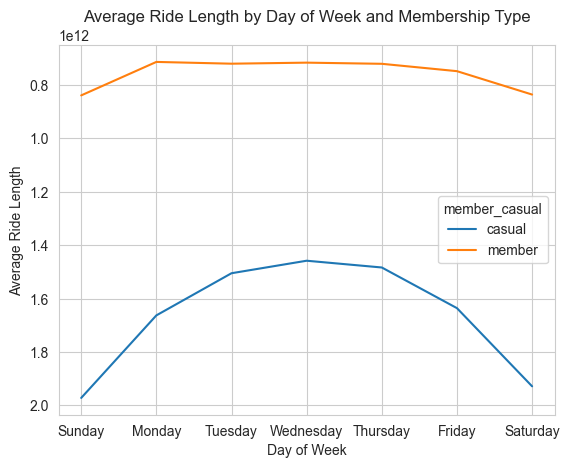

In [257]:
average_ride_time = trip_23.groupby(['member_casual', 'day_of_week'])['ride_length'].mean().reset_index()
sns.set_style("whitegrid")

# Create a line plot using Seaborn
sns.lineplot(x="day_of_week", y="ride_length", hue="member_casual", data=average_ride_time)

# Add labels and title
plt.xlabel("Day of Week")
plt.ylabel("Average Ride Length")
plt.title("Average Ride Length by Day of Week and Membership Type")

# Show the plot
plt.show()

In [262]:
result = trip_23.groupby(['member_casual', 'day_of_week']).agg(
    number_of_rides=('ride_length', 'count'),
    average_duration=('ride_length', 'mean')
).reset_index()

# Sort by member_casual and weekday
result = result.sort_values(['member_casual', 'day_of_week'])

print(result)

/var/folders/qp/l61713l13n95xryc8mf5j6mc0000gn/T/ipykernel_39972/3815817012.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = trip_23.groupby(['member_casual', 'day_of_week']).agg(


   member_casual day_of_week  number_of_rides          average_duration
0         casual      Sunday           335668 0 days 00:32:51.809689931
1         casual      Monday           234818 0 days 00:27:42.886154383
2         casual     Tuesday           246211 0 days 00:25:05.079517162
3         casual   Wednesday           249153 0 days 00:24:18.269810116
4         casual    Thursday           270596 0 days 00:24:43.586908158
5         casual      Friday           311907 0 days 00:27:15.767994947
6         casual    Saturday           410684 0 days 00:32:08.351158068
7         member      Sunday           408829 0 days 00:13:59.421902555
8         member      Monday           494558 0 days 00:11:54.142915492
9         member     Tuesday           576743 0 days 00:12:00.768695935
10        member   Wednesday           586438 0 days 00:11:56.857473424
11        member    Thursday           589572 0 days 00:12:01.188277258
12        member      Friday           531582 0 days 00:12:28.72

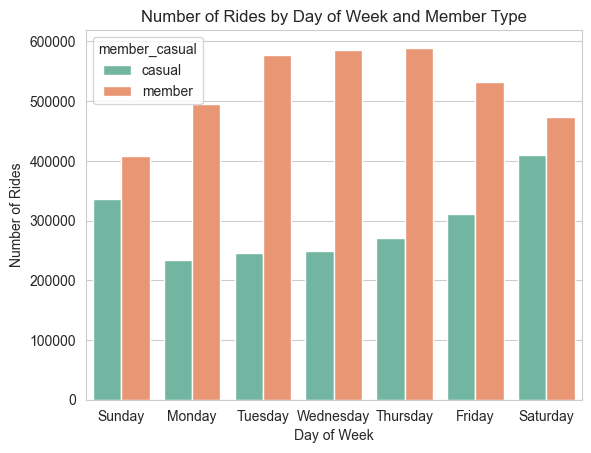

In [276]:
sns.barplot(
    data=result,
    x='day_of_week',
    y='number_of_rides',
    hue='member_casual',
    palette='Set2'
)

plt.title('Number of Rides by Day of Week and Member Type')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.show()

In [210]:
# trip_23.to_csv("trip_23.csv", index=False)